---
title: Lab-3.1 Keras Multi-class classification, MNIST
author: Fanni Varhelyi
date: Oct 11, 2023
format:
    html:
        embed-resources: true
        code-fold: false
        code-overflow: wrap
---

## Instructions

Instructions

Code Multi-class classification using LeNet type architecture CNN to train:
- MNIST training with Keras, in MNIST.ipynb.
- CIFAR training with PyTorch, in CIFAR.ipynb.
- If you use an online reference, please cite the source and don’t copy more than a few lines of code
- Normalize the data as needed
- Visualize the results at the end where possible
- Partition data into training, validation, and test
- Monitor training and validation throughout training by plotting
- For the final fit, report the confusion matrix at the end
- Print training, validation, and test errors at the very end
- You MUST use early stopping:
- Do basic MANUAL hyper-parameter tuning to try to achieve an optimal fit model
- i.e. best training/validation loss without over-fitting
- Explore L1 and L2 regularization and dropout
- Explore different optimizers
- Use the loss functions specified in the textbook
- Explore different options for activation functions, network size/depth, etc
- Document what is going on in the code, as needed, with narrative markdown text between cells.
- Submit the version with hyper parameters that provide the optimal fit i.e. you don’t need to show the outputs of your hyper-parameter tuning process

In [9]:
#import packages
#preprocess:
import numpy as np
from sklearn.model_selection import train_test_split

#train:
from keras.datasets import mnist
from keras import models
from keras import layers
from keras import regularizers
from keras import optimizers
from keras import utils
from keras.callbacks import EarlyStopping

#visualize:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix



In [10]:

#load the data split to training and test
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#check the sahpe
print(x_train.shape)
#need to change shape to be (batch, 28, 28, 1)

x_train = x_train.reshape((60000, 28, 28, 1))

x_test = x_test.reshape((10000, 28, 28, 1))

#further split to train and valid

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=123)

#normalizing
x_train = x_train.astype("float32") / 255 
x_test = x_test.astype("float32") / 255
y_train = utils.to_categorical(y_train, 10)
y_val = utils.to_categorical(y_val, 10)
y_test = utils.to_categorical(y_test, 10)
#reference: https://datascience.stackexchange.com/questions/103644/tensorflow-i-dont-get-the-right-shapes-valueerror-shapes-100-10-10-an

(60000, 28, 28)


In [11]:
#check the shapes
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(48000, 28, 28, 1)
(12000, 28, 28, 1)
(10000, 28, 28, 1)
(48000, 10)
(12000, 10)
(10000, 10)


In [12]:
#setting up the model
#LeNet architecture: https://www.kaggle.com/code/blurredmachine/lenet-architecture-a-complete-guide

#5-layer CNN with tahn + 2 layer dense

def model(opt,l1,l2,d1):
    model = models.Sequential()                                  
    model.add(layers.Conv2D(
                32, 
                kernel_size=(5,5), 
                activation='tanh', 
                input_shape=(28, 28, 1),
                padding = 'same'))
    model.add(layers.MaxPooling2D(
                pool_size=(2, 2),
                strides=(2, 2)))
    model.add(layers.Conv2D(
            64, 
            kernel_size=(3, 3), 
            activation= 'tanh',
            padding = 'same'))
    model.add(layers.MaxPooling2D(
            pool_size=(2, 2),
            strides=(2, 2)))
    model.add(layers.Conv2D(
            128, 
            kernel_size=(5, 5), 
            activation= 'tanh',
            padding = 'same'))
    model.add(layers.Flatten())
    model.add(layers.Dense(
            128, 
            activation='relu', 
            kernel_regularizer=regularizers.L1L2(l1=l1, l2=l2)))
    model.add(layers.Dropout(d1))
    model.add(layers.Dense(
            10, 
            activation='softmax'))
    model.compile(
        optimizer=opt, 
        loss='categorical_crossentropy', 
        metrics=['accuracy'])
    return model

pad = 'same'
opt = optimizers.Adam(learning_rate=0.001) #this gives a warning message but I found it still better than the legacy
l1 = 0.01
l2 = 0.001
d1 = 0
num_epochs = 100


In [13]:
model = model(opt,l1,l2,d1)
history = model.fit(x_train, y_train,           
                    validation_data=(x_val, y_val),
                    epochs=num_epochs, 
                    batch_size=256,
                    callbacks=EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True))

Epoch 1/100
188/188 [==============================] - 21s 112ms/step - loss: 10.3913 - accuracy: 0.8468 - val_loss: 2.2663 - val_accuracy: 0.8049
Epoch 2/100
188/188 [==============================] - 20s 108ms/step - loss: 1.7732 - accuracy: 0.9425 - val_loss: 1.8311 - val_accuracy: 0.8970
Epoch 3/100
188/188 [==============================] - 20s 109ms/step - loss: 1.5452 - accuracy: 0.9660 - val_loss: 1.7294 - val_accuracy: 0.9007
Epoch 4/100
188/188 [==============================] - 22s 117ms/step - loss: 1.4351 - accuracy: 0.9741 - val_loss: 1.6587 - val_accuracy: 0.9033
Epoch 5/100
188/188 [==============================] - 22s 119ms/step - loss: 1.3694 - accuracy: 0.9791 - val_loss: 1.4797 - val_accuracy: 0.9419
Epoch 6/100
188/188 [==============================] - 22s 118ms/step - loss: 1.3244 - accuracy: 0.9820 - val_loss: 1.5279 - val_accuracy: 0.9258
Epoch 7/100
188/188 [==============================] - 24s 126ms/step - loss: 1.3110 - accuracy: 0.9835 - val_loss: 1.4963 

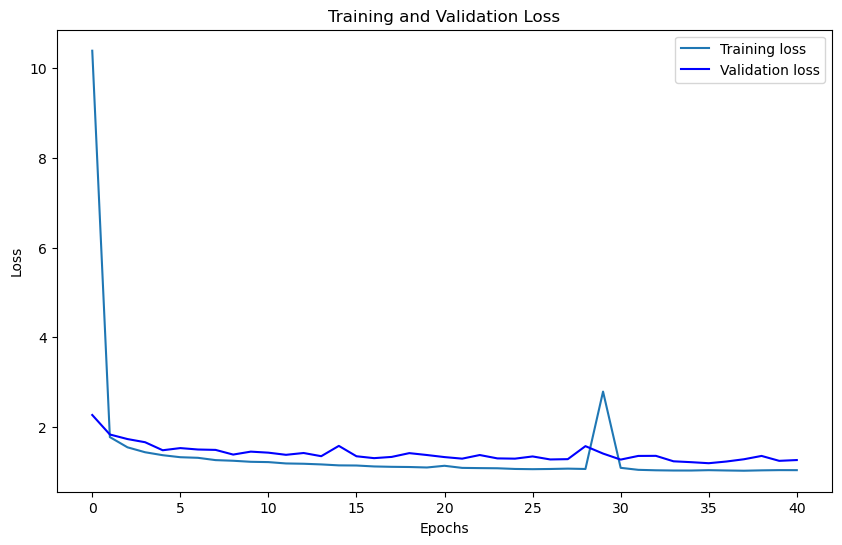

In [14]:
#Tracking training and validation error
plt.figure(figsize=(10, 6))
plt.plot(history.history["loss"], label='Training loss')
plt.plot(history.history["val_loss"], 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
#Fit the test data

train_loss, train_acc = model.evaluate(x_train, y_train)
val_loss, val_acc = model.evaluate(x_val, y_val)
test_loss, test_acc = model.evaluate(x_test, y_test)


print(f"Training loss: {train_loss:.2f}, accuracy: {train_acc:.2%}")
print(f"Validation loss: {train_loss:.2f}, accuracy: {val_acc:.2%}")
print(f"Test loss: {test_loss:.2f}, accuracy: {test_acc:.2%}")

313/313 [==============================] - 2s 7ms/step - loss: 1.0296 - accuracy: 0.9891
Training loss: 1.00, accuracy: 99.92%
Validation loss: 1.00, accuracy: 93.91%
Test loss: 1.03, accuracy: 98.91%


313/313 [==============================] - 2s 6ms/step


Text(0.5, 1.0, 'Confusion Matrix')

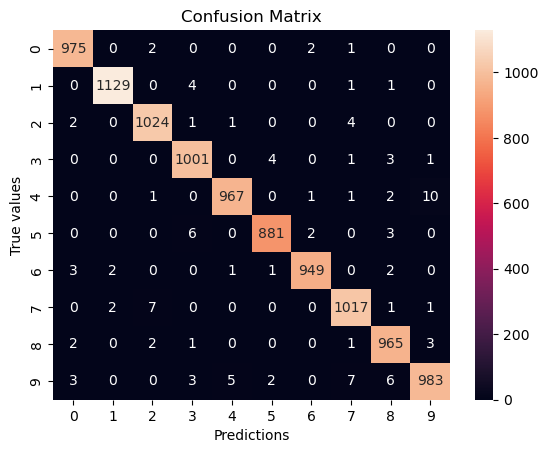

In [16]:
#Confusion matrix

y_hat = model.predict(x_test)
y_pred = np.argmax(y_hat, axis=1)
y_true = np.argmax(y_test, axis=1)
confusion_mtx = confusion_matrix(y_true, y_pred)

ax= plt.subplot()
sns.heatmap(confusion_mtx, annot=True, fmt='d')
ax.set_xlabel('Predictions')
ax.set_ylabel('True values')
ax.set_title('Confusion Matrix')